CIFAR10 데이터셋을 이미지 분류 

컴퓨터 비전 분야에서 딥러닝을 통해 

가장 처음에 고안된 방안인

이미지 분류를 진행해보자!

CIFAR 10 데이터셋은 

3*32*32 픽셀의 60000개의 컬러이미지(RGB) 데이터셋이다.

클래스의 개수는 10개이며 

비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭이 있다.

보통 50000개는 훈련, 10000개는 테스트데이터셋으로 구성하는 편이다.

* `torchvision` - base domain library for Pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computuer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transform` - functions for manipulating your vision data (images) to be suitable foruse with an ML model
* `torch.utils.data.Dataset` - Base dataset class for Pytorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
import torch
import torchvision # 컴퓨터 비전에 필요한 패키징

from torchvision import datasets # Image 데이터셋이 있는곳
from torchvision import transforms # 이미지 전처리(Crop, 어파인 변환 이런게 있는거 같던데)
from torch.utils.data import Dataset # 데이터셋 클래스 상속할 때 쓰는 기반클래스
from torch.utils.data import DataLoader # dataset을 iterable할 수 있게하는 Dataloader

import matplotlib.pyplot as plt
# agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

print(device) # gpu 사용

c:\Users\hyssk\anaconda3\envs\pytorch_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda


In [2]:
# 1. Getting Data (데이터셋 가져오기)

train_dataset=datasets.CIFAR10(root='Data',
                               train=True,
                               transform=transforms.ToTensor(),
                               target_transform=None,
                               download=True)
test_dataset=datasets.CIFAR10(root='Data',
                              train=False,
                              transform=transforms.ToTensor(),
                              target_transform=None,
                              download=True)



Files already downloaded and verified
Files already downloaded and verified


In [3]:
# datasets.CIFAR10를 참조한 train_dataset에 대해 확인하기
print(train_dataset)
print(dir(train_dataset)) # 클래스에 부여된 속성 또는 메소드를 확인할 수 있다. 'class_to_idx', 'classes'
print(len(train_dataset))

print(train_dataset.class_to_idx) # 딕셔너리 형태
print(train_dataset.classes) # 리스트 형태 

print(train_dataset.__getitem__(0)) # 인덱스 0번의 값 출력, 튜플 형태 (텐서정보(3*32*32),클래스넘버) 정보 전달


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: Data
    Split: Train
    StandardTransform
Transform: ToTensor()
['__add__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_integrity', '_format_transform_repr', '_load_meta', '_repr_indent', 'base_folder', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'filename', 'meta', 'root', 'target_transform', 'targets', 'test_list', 'tgz_md5', 'train', 'train_list', 'transform', 'transforms', 'url']
50000
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck':

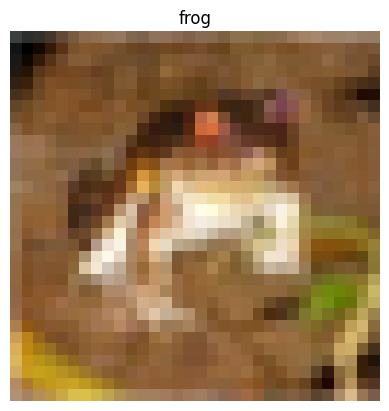

In [4]:
# 데이터셋 추출 후 시각화 해보기

plt.figure()
plt.imshow(train_dataset.__getitem__(0)[0].permute(1,2,0)) # torch의 텐서와 matplotlib의 rgb 순서가 달라서 변환해줘야함.
plt.title(train_dataset.classes[train_dataset.__getitem__(0)[1]])
plt.axis(False)
plt.show()

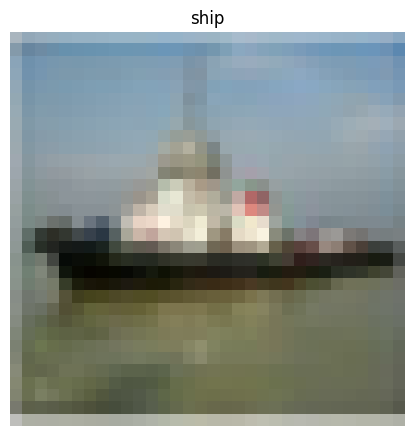

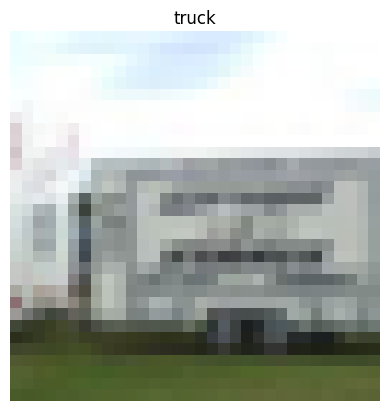

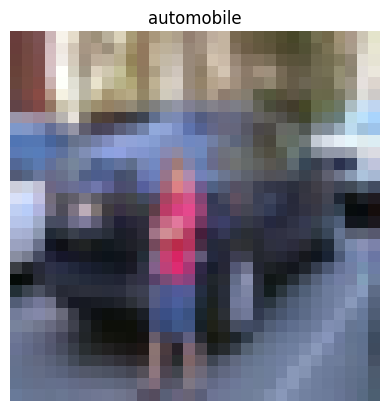

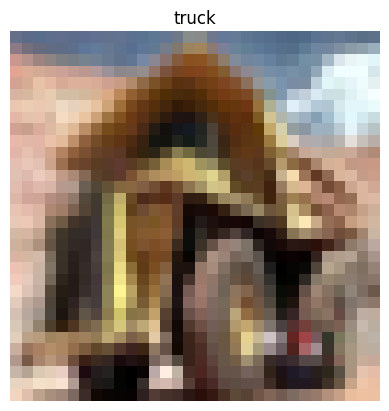

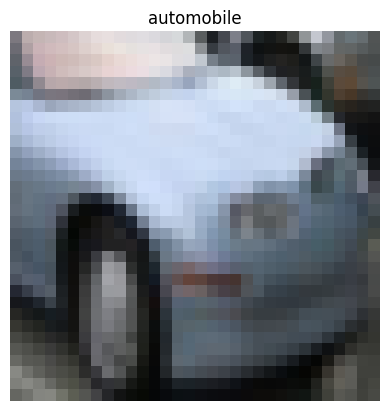

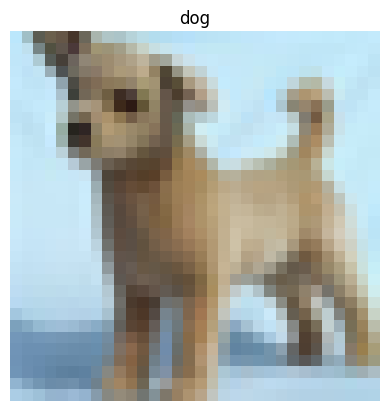

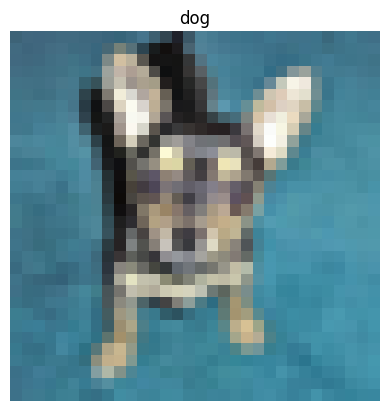

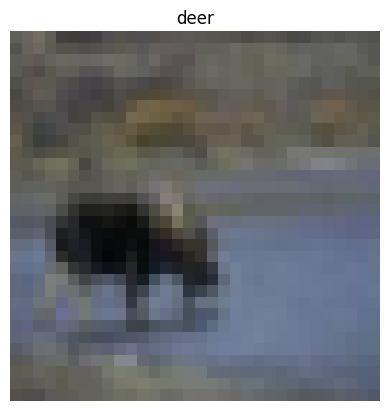

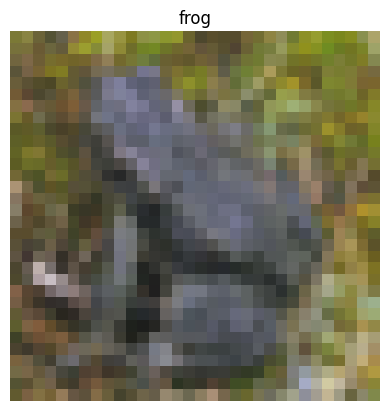

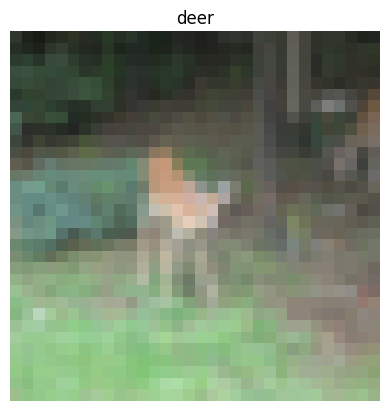

In [5]:
# 랜덤으로 10개 정도 그려보기
import random
fig = plt.figure(figsize=(60,60))
nrows,ncols=1,10

for i in range(1,nrows*ncols+1):
    random_idx = random.randint(a=0, b=len(train_dataset))
    img, idx = train_dataset[random_idx]
    fig.add_subplot(nrows,ncols,i)
    plt.imshow(img.permute(1,2,0))
    plt.axis(False)
    plt.title(train_dataset.classes[idx])
    plt.show()


데이터셋 정보를 iterable한 객체로 만들어서 model에 넣어줘야한다.

DataLoader를 구현해야함

In [6]:
from torch.utils.data import DataLoader
from os import cpu_count
BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True
)
test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=BATCH_SIZE,
                             shuffle=False
                             )

print(train_dataloader)
print(len(train_dataloader)) # 1563 (50000//32) shape(32,3,32,32)
print(dir(train_dataloader)) 

train_dataloader_feature,train_dataloader_label=next(iter(train_dataloader))
test_dataloader_feature,test_dataloader_label=next(iter(test_dataloader))
train_dataloader_feature.shape # shape (32,3,32,32) = (batch_size,channel,height,width)


1563
['_DataLoader__initialized', '_DataLoader__multiprocessing_context', '_IterableDataset_len_called', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_auto_collation', '_dataset_kind', '_get_iterator', '_get_shared_seed', '_index_sampler', '_iterator', 'batch_sampler', 'batch_size', 'check_worker_number_rationality', 'collate_fn', 'dataset', 'drop_last', 'generator', 'multiprocessing_context', 'num_workers', 'persistent_workers', 'pin_memory', 'pin_memory_device', 'prefetch_factor', 'sampler', 'timeout', 'worker_init_fn']


torch.Size([32, 3, 32, 32])

train_dataloader_feature와 train_dataloader_label을 알아보자

In [7]:
print(train_dataloader_feature)
print(train_dataloader_feature.shape)
print(len(train_dataloader_feature))

tensor([[[[1.0000, 0.9882, 0.9725,  ..., 0.1294, 0.1098, 0.0980],
          [0.9961, 0.9804, 0.9843,  ..., 0.1373, 0.1137, 0.1020],
          [1.0000, 0.9804, 0.9882,  ..., 0.1294, 0.1098, 0.0941],
          ...,
          [0.0314, 0.0118, 0.0000,  ..., 0.0157, 0.0078, 0.0039],
          [0.0314, 0.0078, 0.0000,  ..., 0.0078, 0.0078, 0.0235],
          [0.0353, 0.0118, 0.0039,  ..., 0.0431, 0.0627, 0.0667]],

         [[1.0000, 0.9804, 0.9529,  ..., 0.1333, 0.1137, 0.1020],
          [0.9922, 0.9686, 0.9765,  ..., 0.1412, 0.1176, 0.1059],
          [0.9961, 0.9725, 0.9882,  ..., 0.1333, 0.1137, 0.0980],
          ...,
          [0.0353, 0.0118, 0.0000,  ..., 0.0118, 0.0078, 0.0039],
          [0.0353, 0.0118, 0.0000,  ..., 0.0039, 0.0000, 0.0157],
          [0.0392, 0.0157, 0.0039,  ..., 0.0314, 0.0471, 0.0510]],

         [[1.0000, 0.9725, 0.9216,  ..., 0.1137, 0.0941, 0.0824],
          [0.9922, 0.9529, 0.9412,  ..., 0.1216, 0.0980, 0.0863],
          [0.9725, 0.9451, 0.9529,  ..., 0

CIFAR10 데이터셋을 학습시킬 Model 만들어야한다.

TinyVGG (이미지 추출기)를 사용해보자

source - https://poloclub.github.io/cnn-explainer/

In [46]:
from torch import nn

class CIFAR10Model(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv1_block = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(3)
        )
        self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*10*10,
                  out_features=output_shape)
    )
    def forward(self,x):
        x = self.conv1_block(x)
        x = self.classifier(x)
        return x

model0=CIFAR10Model(input_shape=3,hidden_units=16,output_shape=len(train_dataset.classes)).to(device)
print(model0)

CIFAR10Model(
  (conv1_block): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1600, out_features=10, bias=True)
  )
)


In [47]:
from torchsummary import summary
summary(model0,input_size=(3,32,32),batch_size=32,device='cuda')

sample=model0(train_dataloader_feature.to(device))
print(f'sample.shape {sample.shape}')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 16, 32, 32]             448
              ReLU-2           [32, 16, 32, 32]               0
            Conv2d-3           [32, 16, 32, 32]           2,320
              ReLU-4           [32, 16, 32, 32]               0
         MaxPool2d-5           [32, 16, 10, 10]               0
           Flatten-6                 [32, 1600]               0
            Linear-7                   [32, 10]          16,010
Total params: 18,778
Trainable params: 18,778
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.38
Forward/backward pass size (MB): 16.78
Params size (MB): 0.07
Estimated Total Size (MB): 17.23
----------------------------------------------------------------
sample.shape torch.Size([32, 10])


모델 생성 뒤엔 Train, Test Loop를 만들어야한다.

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. print out what's happening.
5. Time it all (for fun).

optimizer와 Loss function도 지정!

In [10]:
import torch.optim
from torch.nn import CrossEntropyLoss

loss_fn = CrossEntropyLoss()
optimizer= torch.optim.Adam(params=model0.parameters(),lr=0.001)

In [11]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [12]:
from tqdm.auto import tqdm
EPOCHS=50
for epoch in tqdm(range(EPOCHS)):
    print(f"---Epochs: {epoch}---")
    train_loss = 0.0 # epoch마다 train_loss를 더함
    train_acc = 0.0
    for batch,(X,y) in enumerate(train_dataloader):
        model0.train()
        X,y = X.to(device),y.to(device)
        # Do the forward pass
        y_pred = model0(X)
        # Calculate loss
        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc+=accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))
        # optimizer zero grad
        optimizer.zero_grad()
        # loss backward 모델의 파라미터 기울기를 계산한다.
        loss.backward() 
        # Optimizer step 모델 가중치 갱신
        optimizer.step()

    train_acc /=len(train_dataloader)   
    train_loss /=len(train_dataloader)
    ### Testing
    test_loss,test_acc=0,0
    model0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader: 
            X_test,y_test=X_test.to(device),y_test.to(device)
            test_pred=model0(X_test)
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred,y_test)
            test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))
            # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
            # Calculate the test acc average per batch
        test_acc/=len(test_dataloader)
        # Print out what's happening
        print(f"\n Train loss:{train_loss:.4f}| Train acc:{train_acc:.4f} | Test_loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

  0%|          | 0/50 [00:00<?, ?it/s]

---Epochs: 0---


  2%|▏         | 1/50 [00:09<08:00,  9.80s/it]


 Train loss:1.5177| Train acc:46.0813 | Test_loss: 1.3110, Test acc: 52.7556
---Epochs: 1---


  4%|▍         | 2/50 [00:19<07:34,  9.47s/it]


 Train loss:1.2408| Train acc:56.5879 | Test_loss: 1.1989, Test acc: 57.6977
---Epochs: 2---


  6%|▌         | 3/50 [00:28<07:20,  9.36s/it]


 Train loss:1.1517| Train acc:60.1028 | Test_loss: 1.1466, Test acc: 60.3634
---Epochs: 3---


  8%|▊         | 4/50 [00:37<07:07,  9.30s/it]


 Train loss:1.0969| Train acc:62.2721 | Test_loss: 1.1172, Test acc: 61.2520
---Epochs: 4---


 10%|█         | 5/50 [00:46<06:57,  9.27s/it]


 Train loss:1.0594| Train acc:63.6196 | Test_loss: 1.0987, Test acc: 61.5016
---Epochs: 5---


 12%|█▏        | 6/50 [00:55<06:46,  9.25s/it]


 Train loss:1.0319| Train acc:64.5493 | Test_loss: 1.0798, Test acc: 62.4601
---Epochs: 6---


 14%|█▍        | 7/50 [01:05<06:38,  9.27s/it]


 Train loss:1.0060| Train acc:65.3171 | Test_loss: 1.0582, Test acc: 63.2588
---Epochs: 7---


 16%|█▌        | 8/50 [01:14<06:28,  9.24s/it]


 Train loss:0.9849| Train acc:66.2268 | Test_loss: 1.0651, Test acc: 63.1190
---Epochs: 8---


 18%|█▊        | 9/50 [01:23<06:20,  9.28s/it]


 Train loss:0.9639| Train acc:66.8346 | Test_loss: 1.0423, Test acc: 63.5982
---Epochs: 9---


 20%|██        | 10/50 [01:33<06:10,  9.27s/it]


 Train loss:0.9473| Train acc:67.4084 | Test_loss: 1.0275, Test acc: 64.5767
---Epochs: 10---


 22%|██▏       | 11/50 [01:42<06:01,  9.26s/it]


 Train loss:0.9352| Train acc:67.7683 | Test_loss: 1.0208, Test acc: 65.1458
---Epochs: 11---


 24%|██▍       | 12/50 [01:51<05:51,  9.26s/it]


 Train loss:0.9206| Train acc:68.3741 | Test_loss: 1.0209, Test acc: 64.8962
---Epochs: 12---


 26%|██▌       | 13/50 [02:00<05:41,  9.24s/it]


 Train loss:0.9116| Train acc:68.7400 | Test_loss: 1.0252, Test acc: 64.7364
---Epochs: 13---


 28%|██▊       | 14/50 [02:10<05:33,  9.26s/it]


 Train loss:0.9007| Train acc:69.0159 | Test_loss: 1.0140, Test acc: 64.7764
---Epochs: 14---


 30%|███       | 15/50 [02:19<05:23,  9.24s/it]


 Train loss:0.8909| Train acc:69.0859 | Test_loss: 1.0161, Test acc: 64.8962
---Epochs: 15---


 32%|███▏      | 16/50 [02:28<05:13,  9.22s/it]


 Train loss:0.8855| Train acc:69.4518 | Test_loss: 1.0089, Test acc: 65.1458
---Epochs: 16---


 34%|███▍      | 17/50 [02:37<05:04,  9.24s/it]


 Train loss:0.8765| Train acc:69.6317 | Test_loss: 1.0097, Test acc: 65.1558
---Epochs: 17---


 36%|███▌      | 18/50 [02:46<04:55,  9.23s/it]


 Train loss:0.8731| Train acc:69.6997 | Test_loss: 0.9996, Test acc: 65.6450
---Epochs: 18---


 38%|███▊      | 19/50 [02:56<04:45,  9.22s/it]


 Train loss:0.8651| Train acc:70.0796 | Test_loss: 1.0016, Test acc: 65.6849
---Epochs: 19---


 40%|████      | 20/50 [03:05<04:35,  9.19s/it]


 Train loss:0.8577| Train acc:70.3575 | Test_loss: 1.0093, Test acc: 65.4253
---Epochs: 20---


 42%|████▏     | 21/50 [03:14<04:27,  9.21s/it]


 Train loss:0.8549| Train acc:70.4195 | Test_loss: 1.0045, Test acc: 65.6150
---Epochs: 21---


 44%|████▍     | 22/50 [03:23<04:17,  9.20s/it]


 Train loss:0.8504| Train acc:70.4275 | Test_loss: 0.9937, Test acc: 66.0843
---Epochs: 22---


 46%|████▌     | 23/50 [03:32<04:08,  9.20s/it]


 Train loss:0.8438| Train acc:70.6774 | Test_loss: 1.0079, Test acc: 65.8147
---Epochs: 23---


 48%|████▊     | 24/50 [03:42<03:59,  9.20s/it]


 Train loss:0.8411| Train acc:70.7474 | Test_loss: 0.9910, Test acc: 65.9145
---Epochs: 24---


 50%|█████     | 25/50 [03:51<03:49,  9.19s/it]


 Train loss:0.8384| Train acc:70.8493 | Test_loss: 1.0199, Test acc: 65.2855
---Epochs: 25---


 52%|█████▏    | 26/50 [04:00<03:40,  9.19s/it]


 Train loss:0.8295| Train acc:71.2292 | Test_loss: 0.9978, Test acc: 65.9944
---Epochs: 26---


 54%|█████▍    | 27/50 [04:10<03:35,  9.35s/it]


 Train loss:0.8304| Train acc:71.2152 | Test_loss: 1.0008, Test acc: 66.1242
---Epochs: 27---


 56%|█████▌    | 28/50 [04:19<03:25,  9.33s/it]


 Train loss:0.8237| Train acc:71.4971 | Test_loss: 1.0225, Test acc: 65.0260
---Epochs: 28---


 58%|█████▊    | 29/50 [04:28<03:15,  9.31s/it]


 Train loss:0.8206| Train acc:71.4551 | Test_loss: 1.0189, Test acc: 65.5351
---Epochs: 29---


 60%|██████    | 30/50 [04:37<03:05,  9.27s/it]


 Train loss:0.8209| Train acc:71.6651 | Test_loss: 0.9980, Test acc: 66.1941
---Epochs: 30---


 62%|██████▏   | 31/50 [04:47<02:55,  9.26s/it]


 Train loss:0.8140| Train acc:71.5951 | Test_loss: 1.0130, Test acc: 65.5052
---Epochs: 31---


 64%|██████▍   | 32/50 [04:56<02:46,  9.24s/it]


 Train loss:0.8129| Train acc:71.7650 | Test_loss: 1.0154, Test acc: 65.8846
---Epochs: 32---


 66%|██████▌   | 33/50 [05:05<02:38,  9.33s/it]


 Train loss:0.8124| Train acc:71.8010 | Test_loss: 1.0033, Test acc: 66.0643
---Epochs: 33---


 68%|██████▊   | 34/50 [05:15<02:30,  9.43s/it]


 Train loss:0.8098| Train acc:71.8590 | Test_loss: 1.0242, Test acc: 64.8662
---Epochs: 34---


 70%|███████   | 35/50 [05:25<02:22,  9.50s/it]


 Train loss:0.8057| Train acc:71.9890 | Test_loss: 1.0298, Test acc: 65.3454
---Epochs: 35---


 72%|███████▏  | 36/50 [05:34<02:14,  9.60s/it]


 Train loss:0.8036| Train acc:72.1029 | Test_loss: 1.0100, Test acc: 65.7947
---Epochs: 36---


 74%|███████▍  | 37/50 [05:47<02:16, 10.49s/it]


 Train loss:0.7996| Train acc:72.4188 | Test_loss: 1.0222, Test acc: 64.9760
---Epochs: 37---


 76%|███████▌  | 38/50 [05:57<02:05, 10.43s/it]


 Train loss:0.7985| Train acc:72.2489 | Test_loss: 1.0149, Test acc: 65.5351
---Epochs: 38---


 78%|███████▊  | 39/50 [06:08<01:54, 10.39s/it]


 Train loss:0.7933| Train acc:72.3309 | Test_loss: 1.0098, Test acc: 65.9245
---Epochs: 39---


 80%|████████  | 40/50 [06:19<01:45, 10.57s/it]


 Train loss:0.7952| Train acc:72.5508 | Test_loss: 1.0276, Test acc: 65.3255
---Epochs: 40---


 82%|████████▏ | 41/50 [06:29<01:33, 10.43s/it]


 Train loss:0.7937| Train acc:72.5188 | Test_loss: 1.0315, Test acc: 65.1857
---Epochs: 41---


 84%|████████▍ | 42/50 [06:39<01:23, 10.42s/it]


 Train loss:0.7905| Train acc:72.7007 | Test_loss: 1.0074, Test acc: 65.7847
---Epochs: 42---


 86%|████████▌ | 43/50 [06:49<01:12, 10.33s/it]


 Train loss:0.7899| Train acc:72.6468 | Test_loss: 1.0222, Test acc: 64.9161
---Epochs: 43---


 88%|████████▊ | 44/50 [06:59<01:01, 10.27s/it]


 Train loss:0.7867| Train acc:72.7027 | Test_loss: 1.0239, Test acc: 65.8646
---Epochs: 44---


 90%|█████████ | 45/50 [07:12<00:54, 10.87s/it]


 Train loss:0.7857| Train acc:72.6647 | Test_loss: 1.0007, Test acc: 66.0942
---Epochs: 45---


 92%|█████████▏| 46/50 [07:22<00:42, 10.67s/it]


 Train loss:0.7831| Train acc:72.7747 | Test_loss: 1.0150, Test acc: 66.4337
---Epochs: 46---


 94%|█████████▍| 47/50 [07:32<00:31, 10.43s/it]


 Train loss:0.7843| Train acc:72.6807 | Test_loss: 1.0310, Test acc: 65.4054
---Epochs: 47---


 96%|█████████▌| 48/50 [07:41<00:20, 10.24s/it]


 Train loss:0.7826| Train acc:72.6128 | Test_loss: 1.0345, Test acc: 65.3155
---Epochs: 48---


 98%|█████████▊| 49/50 [07:51<00:10, 10.10s/it]


 Train loss:0.7797| Train acc:72.9307 | Test_loss: 1.0274, Test acc: 65.5851
---Epochs: 49---


100%|██████████| 50/50 [08:01<00:00,  9.63s/it]


 Train loss:0.7811| Train acc:72.7627 | Test_loss: 1.0431, Test acc: 64.6166


epoch 33부터 Train_loss 74를 유지한다. 하지만 만약 이것이 서비스로 내놔야하는 모델이라면,

매우 낮은 수준의 모델이다. 예측이 저조하다.

Test_acc도 65로 35퍼 정도는 틀릴 가능성이 있다.

모델 측면에서 성능을 올리는 방법을 찾아보자

* Adding layer

* Increase the number of hidden inits

* change/add activation function

* change the optimization function

* Change learning rate

* fitting for longer

In [13]:
from torch import nn
'''이전 모델보다 레이어 추가와 '''
class CIFAR10Model1(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv1_block = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(3)
        )
        self.conv1_block1 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(3)
        )
        self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*3*3,
                  out_features=output_shape)
    )
    def forward(self,x):
        x = self.conv1_block(x)
        #print(x.shape)
        x = self.conv1_block1(x)
        #print(x.shape)
        x = self.classifier(x)
        return x
    

model1=CIFAR10Model1(input_shape=3,hidden_units=10,output_shape=len(train_dataset.classes)).to(device)
print(model1)

CIFAR10Model1(
  (conv1_block): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (conv1_block1): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=90, out_features=10, bias=True)
  )
)


In [14]:
summary(model1,(3,32,32),32,device="cuda")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 10, 32, 32]             280
              ReLU-2           [32, 10, 32, 32]               0
            Conv2d-3           [32, 10, 32, 32]             910
              ReLU-4           [32, 10, 32, 32]               0
         MaxPool2d-5           [32, 10, 10, 10]               0
            Conv2d-6           [32, 10, 10, 10]             910
              ReLU-7           [32, 10, 10, 10]               0
            Conv2d-8           [32, 10, 10, 10]             910
              ReLU-9           [32, 10, 10, 10]               0
        MaxPool2d-10             [32, 10, 3, 3]               0
          Flatten-11                   [32, 90]               0
           Linear-12                   [32, 10]             910
Total params: 3,920
Trainable params: 3,920
Non-trainable params: 0
-----------------------------------

In [16]:
from tqdm.auto import tqdm
EPOCHS=2
for epoch in tqdm(range(EPOCHS)):
    print(f"---Epochs: {epoch}---")
    train_loss = 0.0 # epoch마다 train_loss를 더함
    train_acc = 0.0
    for batch,(X,y) in enumerate(train_dataloader):
        model1.train()
        X,y = X.to(device),y.to(device)
        # Do the forward pass
        y_pred = model1(X)
        # Calculate loss
        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc+=accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))
        # optimizer zero grad
        optimizer.zero_grad()
        # loss backward 모델의 파라미터 기울기를 계산한다.
        loss.backward() 
        # Optimizer step 모델 가중치 갱신
        optimizer.step()

    train_acc /=len(train_dataloader)   
    train_loss /=len(train_dataloader)
    ### Testing
    test_loss,test_acc=0,0
    model1.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader: 
            X_test,y_test=X_test.to(device),y_test.to(device)
            test_pred=model1(X_test)
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred,y_test)
            test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))
            # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
            # Calculate the test acc average per batch
        test_acc/=len(test_dataloader)
        # Print out what's happening
        print(f"\n Train loss:{train_loss:.4f}| Train acc:{train_acc:.4f} | Test_loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

  0%|          | 0/2 [00:00<?, ?it/s]

---Epochs: 0---


 50%|█████     | 1/2 [00:12<00:12, 12.19s/it]


 Train loss:2.3048| Train acc:10.2927 | Test_loss: 2.3049, Test acc: 10.1837
---Epochs: 1---


100%|██████████| 2/2 [00:23<00:00, 11.89s/it]


 Train loss:2.3048| Train acc:10.2927 | Test_loss: 2.3049, Test acc: 10.1837


conv2d block 1개 더 추가하였지만 오히려 더 성능이 낮아짐.

In [26]:
from torch import nn
'''hiddent units 추가'''
class CIFAR10Model1(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv1_block = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(3)
        )
        self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*10*10,
                  out_features=output_shape)
    )
    def forward(self,x):
        x = self.conv1_block(x)
        print(x)
        x = self.classifier(x)
        return x
    
model2=CIFAR10Model1(input_shape=3,hidden_units=32,output_shape=len(train_dataset.classes)).to(device)
print(model2)

CIFAR10Model1(
  (conv1_block): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3200, out_features=10, bias=True)
  )
)


In [27]:
summary(model2,(3,32,32),32,device="cuda")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 32, 32, 32]             896
              ReLU-2           [32, 32, 32, 32]               0
            Conv2d-3           [32, 32, 32, 32]           9,248
              ReLU-4           [32, 32, 32, 32]               0
         MaxPool2d-5           [32, 32, 10, 10]               0
           Flatten-6                 [32, 3200]               0
            Linear-7                   [32, 10]          32,010
Total params: 42,154
Trainable params: 42,154
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.38
Forward/backward pass size (MB): 33.56
Params size (MB): 0.16
Estimated Total Size (MB): 34.10
----------------------------------------------------------------


In [28]:
from tqdm.auto import tqdm
EPOCHS=6
for epoch in tqdm(range(EPOCHS)):
    print(f"---Epochs: {epoch}---")
    train_loss = 0.0 # epoch마다 train_loss를 더함
    train_acc = 0.0
    for batch,(X,y) in enumerate(train_dataloader):
        model2.train()
        X,y = X.to(device),y.to(device)
        # Do the forward pass
        y_pred = model2(X)
        # Calculate loss
        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc+=accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))
        # optimizer zero grad
        optimizer.zero_grad()
        # loss backward 모델의 파라미터 기울기를 계산한다.
        loss.backward() 
        # Optimizer step 모델 가중치 갱신
        optimizer.step()

    train_acc /=len(train_dataloader)   
    train_loss /=len(train_dataloader)
    ### Testing
    test_loss,test_acc=0,0
    model1.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader: 
            X_test,y_test=X_test.to(device),y_test.to(device)
            test_pred=model2(X_test)
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred,y_test)
            test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))
            # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
            # Calculate the test acc average per batch
        test_acc/=len(test_dataloader)
        # Print out what's happening
        print(f"\n Train loss:{train_loss:.4f}| Train acc:{train_acc:.4f} | Test_loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

  0%|          | 0/6 [00:00<?, ?it/s]

---Epochs: 0---


 17%|█▋        | 1/6 [00:10<00:50, 10.17s/it]


 Train loss:2.3028| Train acc:8.8052 | Test_loss: 2.3026, Test acc: 8.2967
---Epochs: 1---


 33%|███▎      | 2/6 [00:20<00:41, 10.31s/it]


 Train loss:2.3028| Train acc:8.8132 | Test_loss: 2.3026, Test acc: 8.2967
---Epochs: 2---


 50%|█████     | 3/6 [00:31<00:31, 10.41s/it]


 Train loss:2.3028| Train acc:8.8072 | Test_loss: 2.3026, Test acc: 8.2967
---Epochs: 3---


 67%|██████▋   | 4/6 [00:41<00:20, 10.25s/it]


 Train loss:2.3028| Train acc:8.8092 | Test_loss: 2.3026, Test acc: 8.2967
---Epochs: 4---


 83%|████████▎ | 5/6 [00:51<00:10, 10.23s/it]


 Train loss:2.3028| Train acc:8.8052 | Test_loss: 2.3026, Test acc: 8.2967
---Epochs: 5---


100%|██████████| 6/6 [01:01<00:00, 10.23s/it]


 Train loss:2.3028| Train acc:8.8052 | Test_loss: 2.3026, Test acc: 8.2967
